### **Objetivo General**

El código busca implementar, evaluar y comparar tres modelos de aprendizaje supervisado (Regresión Logística, SVM y Árbol de Decisión) para predecir si un cliente realizará una compra o no, basándose en características como edad y salario estimado.

In [16]:
# Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap


In [17]:
# Cargar el dataset
df = pd.read_csv("Social_Network_Ads.csv")

Primeras 5 filas del dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

Estadísticas descriptivas:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
m

<Figure size 1200x800 with 0 Axes>

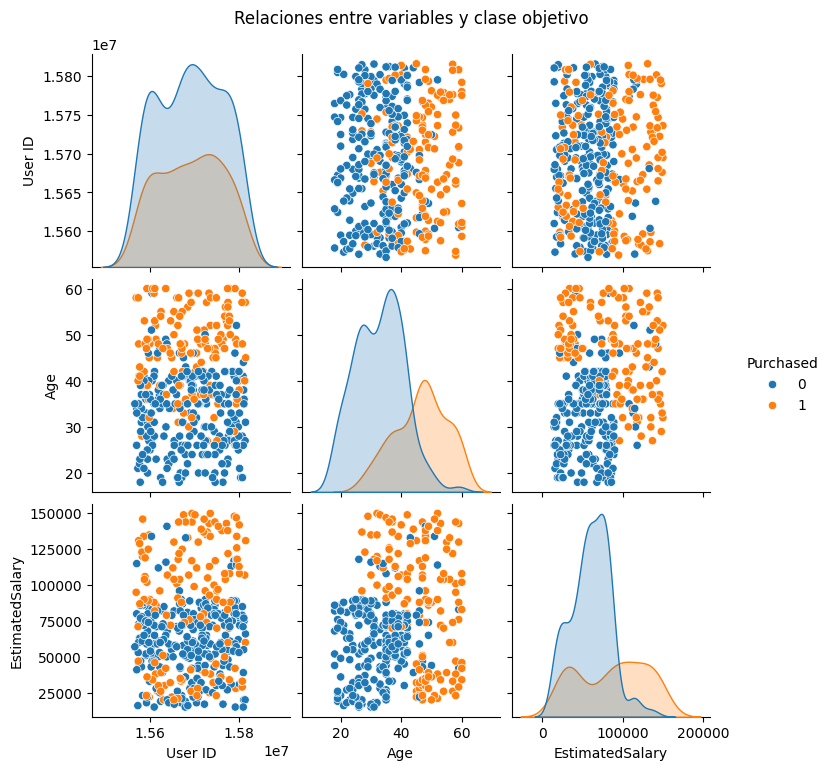

In [18]:
# Visualización inicial de los datos
print("Primeras 5 filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

# Visualización de correlaciones
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Purchased')
plt.suptitle('Relaciones entre variables y clase objetivo', y=1.02)
plt.savefig('pairplot.png')  # Guardar figura para referencia
plt.show()


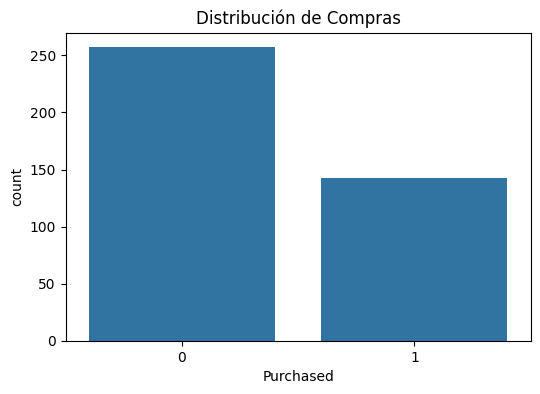

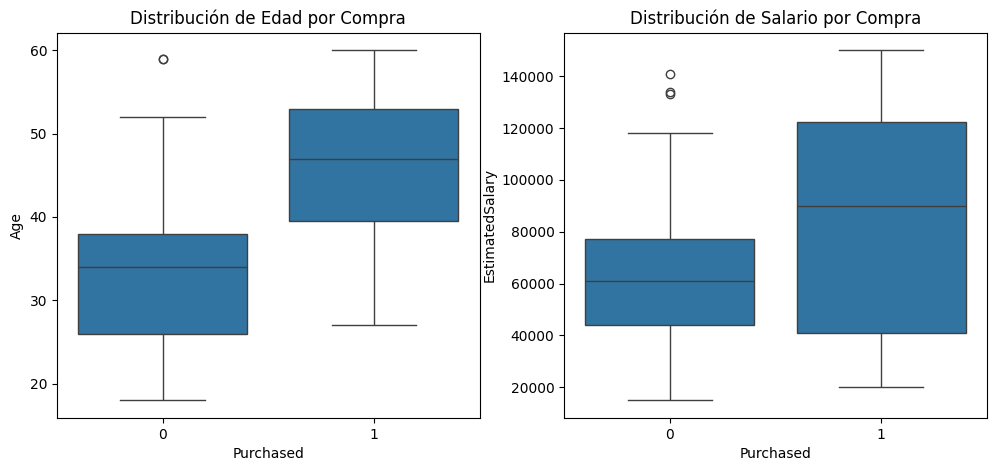

In [19]:
# Gráfico de barras para ver el balance de la clase objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=df)
plt.title('Distribución de Compras')
plt.savefig('balance_clases.png')

# Boxplots para detectar outliers y ver distribución entre edades y salarios según la compra
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Purchased', y='Age', data=df)
plt.title('Distribución de Edad por Compra')

plt.subplot(1, 2, 2)
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df)
plt.title('Distribución de Salario por Compra')
plt.savefig('boxplots_eda.png')

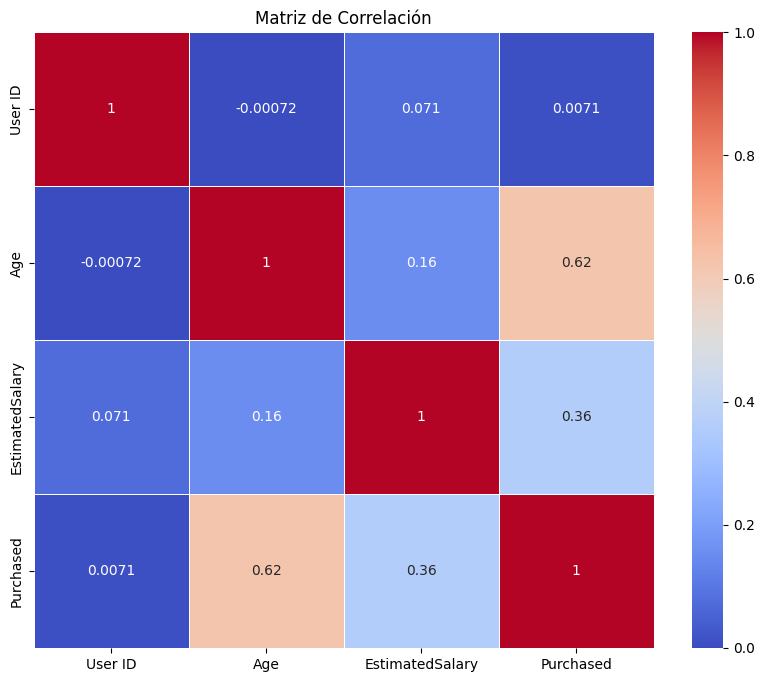

In [20]:
# Matriz de correlación (solo con columnas numéricas)
plt.figure(figsize=(10, 8))
# Seleccionamos solo columnas numéricas para la correlación
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.savefig('correlation_matrix.png')
plt.show()

In [21]:
# 3. Preprocesamiento
# Eliminamos columnas que no vamos a utilizar (si el dataset contiene 'User ID' y 'Gender')
if 'User ID' in df.columns:
    df = df.drop('User ID', axis=1)

# Si existe la columna 'Gender', la convertimos en numérica para poder usarla como característica
if 'Gender' in df.columns:
    # Convertimos 'Gender' a variable numérica (0: Female, 1: Male)
    df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
    # Selección de características incluyendo 'Gender'
    X = df[['Gender', 'Age', 'EstimatedSalary']]
else:
    # Si no hay columna Gender, usamos solo Age y EstimatedSalary
    X = df[['Age', 'EstimatedSalary']]

y = df['Purchased']

# Verificar si hay valores nulos en el dataset
print(df.isnull().sum())

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [22]:
# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (320, 3)
Tamaño del conjunto de prueba: (80, 3)



MODELO 1: REGRESIÓN LOGÍSTICA

Matriz de Confusión (Regresión Logística):
[[50  2]
 [ 7 21]]


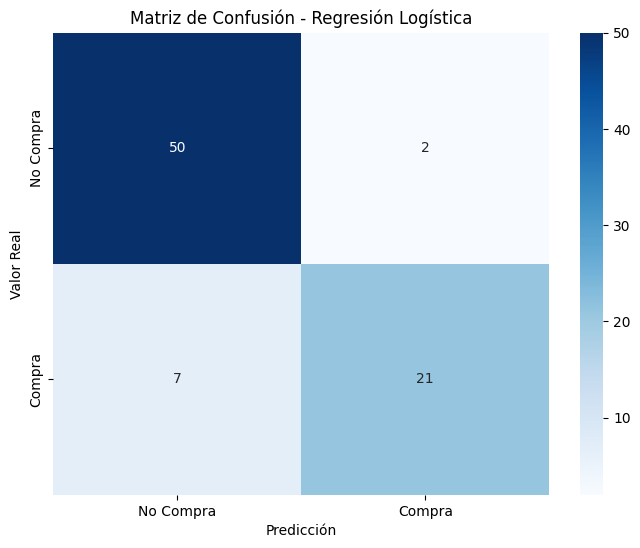


Reporte de Clasificación (Regresión Logística):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80


Coeficientes del modelo de Regresión Logística:
Intercept: -1.0662
Coeficiente para Edad: 0.1364
Coeficiente para Salario Estimado: 2.0377


In [23]:
# 4. Implementación de Regresión Logística
print("\n" + "="*50)
print("MODELO 1: REGRESIÓN LOGÍSTICA")
print("="*50)

# Entrenamiento del modelo
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test)

# Evaluación
print("\nMatriz de Confusión (Regresión Logística):")
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix_lr)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Compra', 'Compra'],
            yticklabels=['No Compra', 'Compra'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.savefig('confusion_matrix_lr.png')
plt.show()

print("\nReporte de Clasificación (Regresión Logística):")
print(classification_report(y_test, y_pred_lr))

# Coeficientes del modelo
print("\nCoeficientes del modelo de Regresión Logística:")
print(f"Intercept: {lr.intercept_[0]:.4f}")
print(f"Coeficiente para Edad: {lr.coef_[0][0]:.4f}")
print(f"Coeficiente para Salario Estimado: {lr.coef_[0][1]:.4f}")



MODELO 2: SUPPORT VECTOR MACHINE (SVM)

Matriz de Confusión (SVM):
[[48  4]
 [ 2 26]]


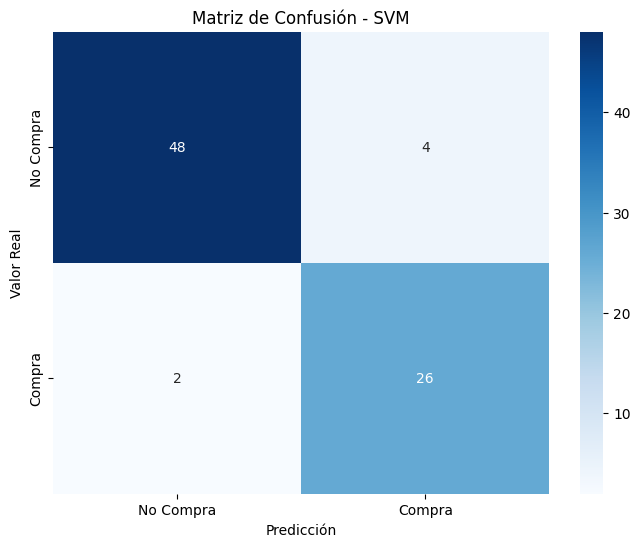


Reporte de Clasificación (SVM):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [24]:
# 5. Implementación de SVM (Support Vector Machine)
print("\n" + "="*50)
print("MODELO 2: SUPPORT VECTOR MACHINE (SVM)")
print("="*50)

# Entrenamiento del modelo
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Predicciones
y_pred_svm = svm.predict(X_test)

# Evaluación
print("\nMatriz de Confusión (SVM):")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Compra', 'Compra'],
            yticklabels=['No Compra', 'Compra'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - SVM')
plt.savefig('confusion_matrix_svm.png')
plt.show()

print("\nReporte de Clasificación (SVM):")
print(classification_report(y_test, y_pred_svm))


MODELO 3: ÁRBOL DE DECISIÓN

Matriz de Confusión (Árbol de Decisión):
[[48  4]
 [ 3 25]]


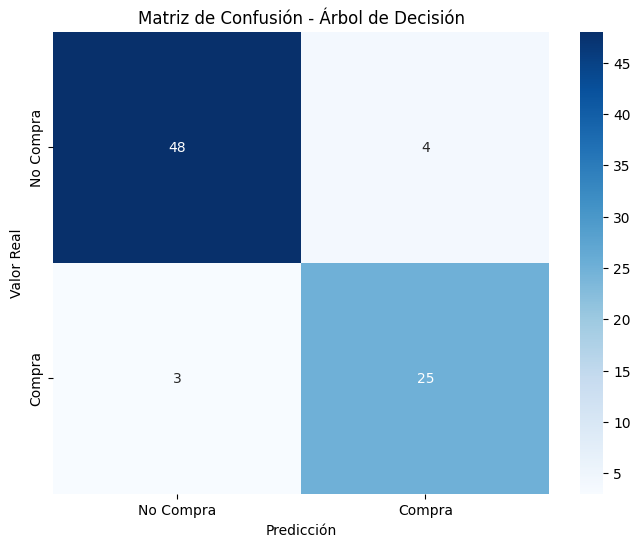


Reporte de Clasificación (Árbol de Decisión):
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80


Importancia de características (Árbol de Decisión):
Importancia de Edad: 0.0000
Importancia de Salario Estimado: 0.5054


In [25]:
# 6. Implementación de Árbol de Decisión
print("\n" + "="*50)
print("MODELO 3: ÁRBOL DE DECISIÓN")
print("="*50)

# Entrenamiento del modelo
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Predicciones
y_pred_tree = tree.predict(X_test)

# Evaluación
print("\nMatriz de Confusión (Árbol de Decisión):")
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(conf_matrix_tree)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Compra', 'Compra'],
            yticklabels=['No Compra', 'Compra'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.savefig('confusion_matrix_tree.png')
plt.show()

print("\nReporte de Clasificación (Árbol de Decisión):")
print(classification_report(y_test, y_pred_tree))

# Importancia de características
print("\nImportancia de características (Árbol de Decisión):")
print(f"Importancia de Edad: {tree.feature_importances_[0]:.4f}")
print(f"Importancia de Salario Estimado: {tree.feature_importances_[1]:.4f}")



COMPARACIÓN DE MODELOS CON VALIDACIÓN CRUZADA
Regresión Logística: Accuracy promedio = 0.820, Desviación Estándar = 0.109
SVM: Accuracy promedio = 0.900, Desviación Estándar = 0.045
Árbol de Decisión: Accuracy promedio = 0.827, Desviación Estándar = 0.062

Resumen de validación cruzada:
                Modelo  Accuracy Promedio  Desviación Estándar
0  Regresión Logística             0.8200             0.109144
1                  SVM             0.9000             0.044721
2    Árbol de Decisión             0.8275             0.061948


C:\Users\andre\AppData\Local\Temp\ipykernel_3084\254775568.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Accuracy Promedio', data=cv_df, palette='viridis')


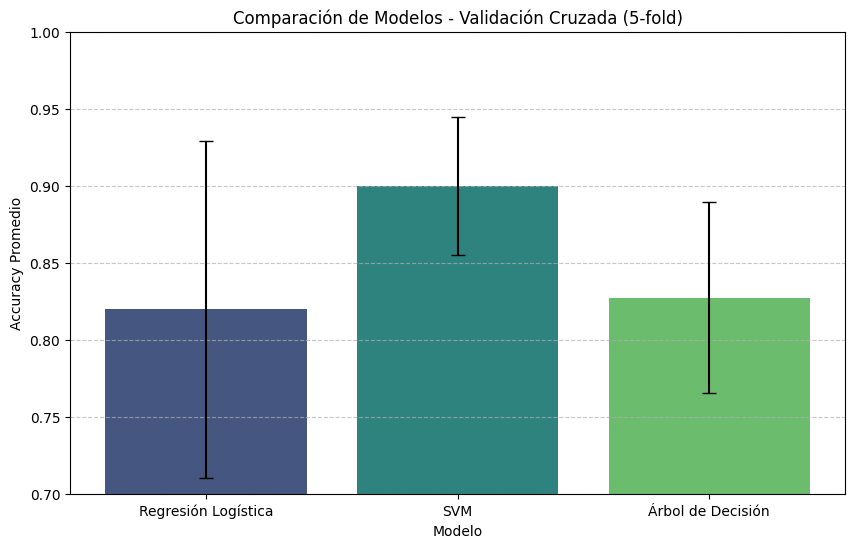

In [26]:
# 7. Comparación de modelos con validación cruzada
print("\n" + "="*50)
print("COMPARACIÓN DE MODELOS CON VALIDACIÓN CRUZADA")
print("="*50)

models = {
    'Regresión Logística': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    'Árbol de Decisión': DecisionTreeClassifier(max_depth=4, random_state=42)
}

# Lista para almacenar resultados
cv_results = []

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_results.append({
        'Modelo': name,
        'Accuracy Promedio': scores.mean(),
        'Desviación Estándar': scores.std(),
        'Scores': scores
    })
    print(f"{name}: Accuracy promedio = {scores.mean():.3f}, Desviación Estándar = {scores.std():.3f}")

# Visualización de resultados de validación cruzada
cv_df = pd.DataFrame(cv_results)[['Modelo', 'Accuracy Promedio', 'Desviación Estándar']]
print("\nResumen de validación cruzada:")
print(cv_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Accuracy Promedio', data=cv_df, palette='viridis')
plt.errorbar(x=range(len(cv_df)), y=cv_df['Accuracy Promedio'],
             yerr=cv_df['Desviación Estándar'], fmt='none', color='black', capsize=5)
plt.title('Comparación de Modelos - Validación Cruzada (5-fold)')
plt.ylim(0.7, 1.0)  # Ajustar según los resultados
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('cross_validation_comparison.png')
plt.show()


VISUALIZACIÓN DE FRONTERAS DE DECISIÓN
Preparando visualización con 2 dimensiones (Age y EstimatedSalary)...
Generando visualizaciones de fronteras de decisión...


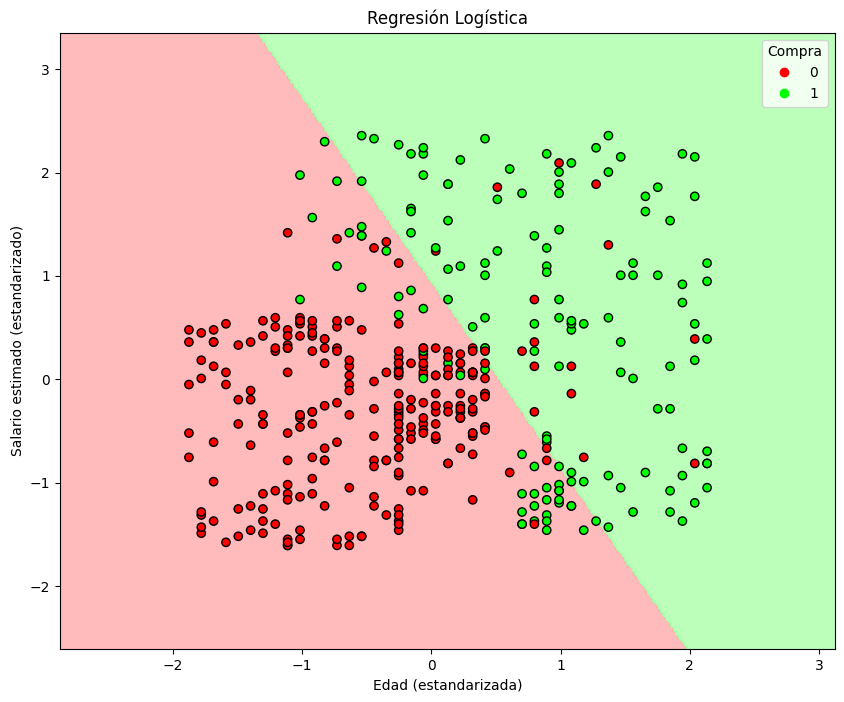

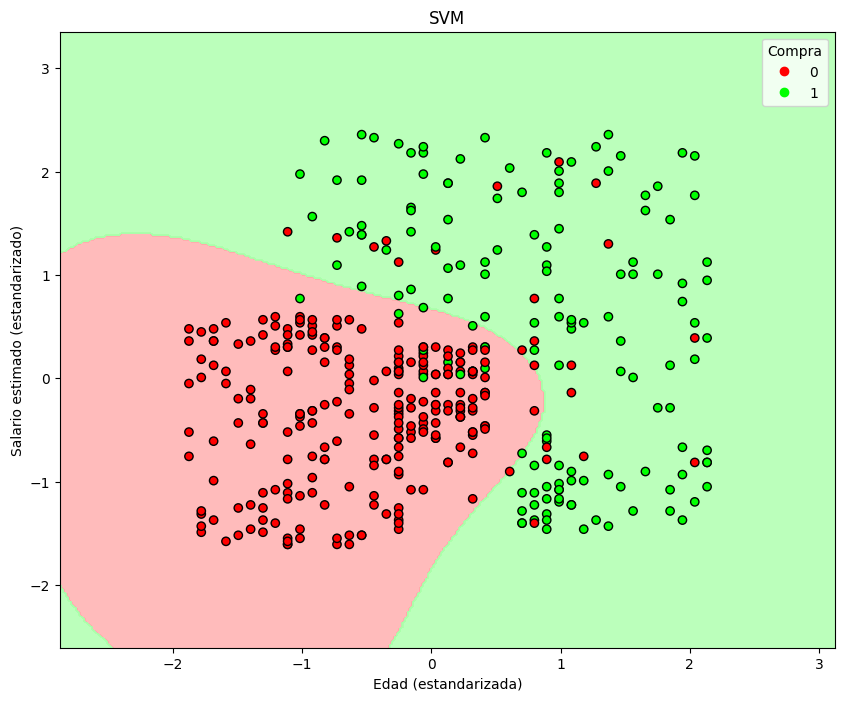

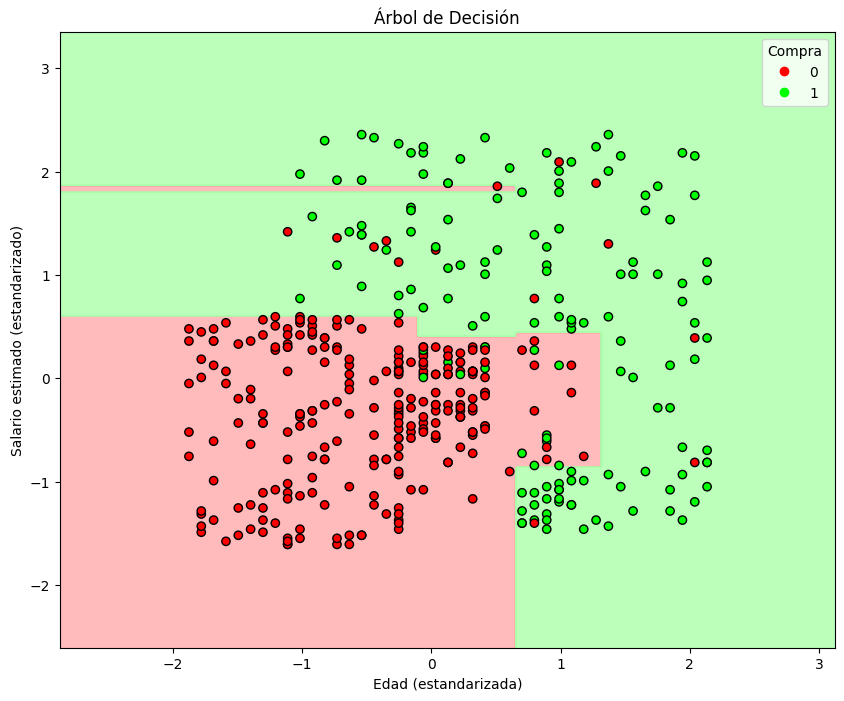


RESPUESTAS A LAS PREGUNTAS TÉCNICAS Y DE INTERPRETACIÓN


In [27]:
# 8. Visualización de fronteras de decisión
print("\n" + "="*50)
print("VISUALIZACIÓN DE FRONTERAS DE DECISIÓN")
print("="*50)

# Para visualizar las fronteras de decisión, usaremos solo Age y EstimatedSalary
print("Preparando visualización con 2 dimensiones (Age y EstimatedSalary)...")

# Entrenamos nuevos modelos con solo 2 características pero usando los mismos datos de entrenamiento
# Seleccionamos solo Age y EstimatedSalary del conjunto de entrenamiento
X_train_2d = X_train[:, -2:] if X_train.shape[1] > 2 else X_train

# Entrenamos modelos con solo 2 dimensiones para la visualización
lr_2d = LogisticRegression(random_state=42)
svm_2d = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
tree_2d = DecisionTreeClassifier(max_depth=4, random_state=42)

# Entrenamos estos modelos simplificados
lr_2d.fit(X_train_2d, y_train)
svm_2d.fit(X_train_2d, y_train)
tree_2d.fit(X_train_2d, y_train)

def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir con el modelo
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))

    # Graficar los puntos de entrenamiento
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y,
                         edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00']))

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Edad (estandarizada)')
    plt.ylabel('Salario estimado (estandarizado)')
    plt.legend(*scatter.legend_elements(), title="Compra")
    plt.savefig(f'decision_boundary_{title.replace(" ", "_").lower()}.png')
    plt.show()

# Obtenemos datos de X_scaled pero solo las últimas 2 columnas (Age y EstimatedSalary)
X_2d_vis = X_scaled[:, -2:] if X_scaled.shape[1] > 2 else X_scaled

# Visualizar fronteras de decisión para cada modelo (usando solo 2 dimensiones)
print("Generando visualizaciones de fronteras de decisión...")
plot_decision_boundary(lr_2d, X_2d_vis, y, "Regresión Logística")
plot_decision_boundary(svm_2d, X_2d_vis, y, "SVM")
plot_decision_boundary(tree_2d, X_2d_vis, y, "Árbol de Decisión")

# Respuestas a las preguntas técnicas y de interpretación
print("\n" + "="*50)
print("RESPUESTAS A LAS PREGUNTAS TÉCNICAS Y DE INTERPRETACIÓN")
print("="*50)